# NYC Municipal Building Energy Benchmarking and Energy Source Score Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Read in data into a dataframe
# dont forget .csv in path name
data = pd.read_csv(r"C:\Users\johnl\Documents\Energy and Water\Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016.csv")

# Display top of dataframe
data.head(10)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,525 East 68th Street,Not Available,...,414.2,04/27/2017 11:23:27 AM,No,In Compliance,40.761395,-73.957726,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
6,7,4778352,Annex Building & Garage,28402,NYP Cornell (East Campus),1014820040,1-01482-0040,1081252,523 East 70th St,515 East 70th St,...,Not Available,04/27/2017 11:23:27 AM,Yes,In Compliance,40.765949,-73.953752,8.0,5.0,124.0,Lenox Hill-Roosevelt Island ...
7,10,2610789,North Shore Towers,2610789,North Shore Towers,4084890001,4084890001,4456886;4456885;4453535;4456888,270-10 Grand Central Parkway,269-271-10 Grand Central Parkway,...,151172.9,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.0,23.0,155101.0,Glen Oaks-Floral Park-New Hyde Park ...
8,11,2611745,Towers Golf Course and Irrigation Wells,2610789,North Shore Towers,4084890001,4084890001,4456888,272-86 Grand Central Parkway,Not Available,...,3574.2,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.0,23.0,155101.0,Glen Oaks-Floral Park-New Hyde Park ...
9,12,3616379,North Shore Towers Bld 1,2610789,North Shore Towers,4084890001,4084890001,4456886,271-10 Grand Central Parkway,Not Available,...,Not Available,04/28/2017 07:44:37 AM,Yes,In Compliance,40.757859,-73.715543,13.0,23.0,155101.0,Glen Oaks-Floral Park-New Hyde Park ...


So our null data is represented as Not Availible rather than Nan or null which means they wont register as null values and also some features will be misrepresented, by this I mean numeric features will be represented as an object rather int or float because if there is a string in the one of the rows the entire column will be converted to object datatype. So we will have to change the representation of our null data and also convert features to their proper types.

In [3]:
data.shape

(11746, 60)

### Data Shape
- (11746, 60)
- 11746 rows 
- 60 columns 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

data[]

## Target
**ENERGY STAR Score** A 1-to-100 percentile ranking for specified building types, calculated in Portfolio Manager, based on self-reported energy usage for the reporting year. <br>
**Few things to note about the target <br>**
- As we are working in a percentile ranking we should expect to see a uniform distribution for the feature (which is handy)
- 1 is the worst
- 100 is the best
- **it is self reported so there very much might be bias in reporting**


## Data Type Correction
As mentioned earlier we will need to convert the Not Availible string to either null values or nan

In [5]:

# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})
data.head(1)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...


In [6]:
data.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weath

From our examination our the column names there are several columns  with numeric units of measurement such as kBtu/ft, kWh, ft <br>
These columns have numeric data and thus need to be represented as numeric types

In [7]:
# list of units in df
units = ['ft²','kBtu','Metric Tons CO2e','kWh','therms','gal','Score']
for i in list(data.columns):
    for unit in units:
        if unit in i:
            
            # Convert the data type to float
            data[i] = data[i].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

In [8]:
data['Water Required?']

0         No
1         No
2         No
3         No
4         No
5         No
6        Yes
7        Yes
8        Yes
9        Yes
10       Yes
11       NaN
12       Yes
13       NaN
14        No
15       Yes
16       NaN
17       Yes
18       Yes
19       NaN
20       Yes
21       Yes
22       NaN
23       Yes
24        No
25       Yes
26        No
27       NaN
28       NaN
29       NaN
        ... 
11716    Yes
11717     No
11718    NaN
11719     No
11720    Yes
11721    Yes
11722     No
11723    Yes
11724     No
11725    Yes
11726    Yes
11727    Yes
11728     No
11729     No
11730    NaN
11731    Yes
11732    Yes
11733     No
11734     No
11735    Yes
11736    Yes
11737     No
11738     No
11739    NaN
11740    NaN
11741    NaN
11742    NaN
11743    NaN
11744    NaN
11745    Yes
Name: Water Required?, Length: 11746, dtype: object

In [9]:
# simple stats for each col
data.describe()


,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,...,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,...,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,...,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,...,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,...,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,...,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,...,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,962428.000000,591640.000000,2019.000000,161.000000,100.000000,100.000000,...,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


# Missing Values

In [10]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


We will remove columns with a large percentage of missing values, for example "Fuel Oil #1 Use (kBtu)" has a missing percent of of 99.99% so this column will provide us with no benefical information

In [11]:

missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 45].index)
data = data.drop(columns = list(missing_columns))

data.shape

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


(11746, 49)

# Exploratory Data Analysis

In [12]:
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johnl\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\johnl\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\johnl\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0.5, 1.0, 'SalePrice distribution')

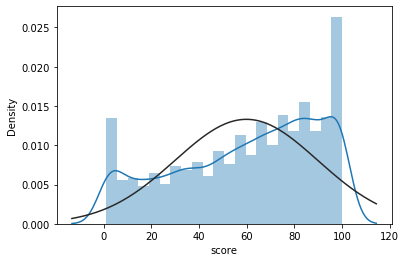

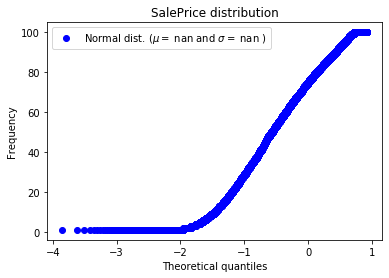

In [13]:


from scipy import stats
(mu, sigma) =stats.norm.fit(data['score'])
sns.distplot(data['score'], fit = stats.norm)
fig = plt.figure()
res = stats.probplot(data['score'], plot=plt)

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

As this is a percentile rank system we would expect each percentile to have the same number of buildings, however each end clearly has a disproportionate amount. The most obvious explanation for this is dishonest self reporting. As we assume the less energy a building uses the better their score will be so they are incentivised to report lower usage in order to receive a better score. We might have to look at other features as better estimators, Energy Use Intensity (EUI) would be a good alternative as it is not self reported and also deals with energy usage 

**Site EUI (kBtu/ft²)** Energy use intensity as calculated by Portfolio Manager
at the property site in kBtus per gross square foot
(kBtu/ft2), for the reporting year.

This might be a more effective measure for energy efficeny than the score rating. 

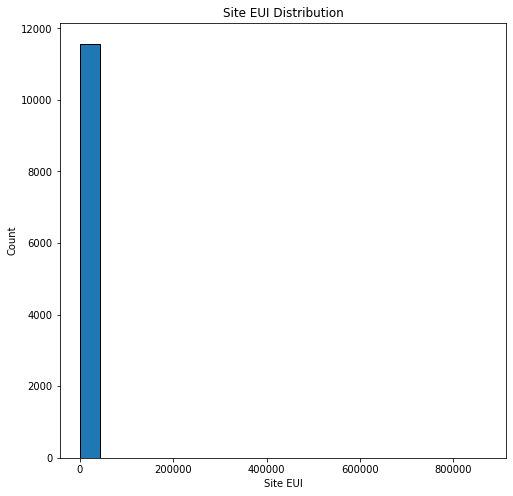

In [14]:
from IPython.core.pylabtools import figsize

# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');


Clearly we have some major outliers which are skewing our data severly. 

#### Identifcation of Outliers
I will be using the 1.5 IQR rule for my classification of outliers <br>
The method for the 1.5 interquartile range (IQR) rule is as follows:
1. Calculate the interquartile range for the data.
2. Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
3. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
4. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

In [15]:
Q1 = data['Site EUI (kBtu/ft²)'].quantile(.25)
Q3 = data['Site EUI (kBtu/ft²)'].quantile(.75)
IRQ = Q3 - Q1
IRQ_rule = 1.5 * IRQ
print(IRQ_rule)
print(Q3+ IRQ_rule)
outliers = data[(data['Site EUI (kBtu/ft²)'] < (Q1 - IRQ_rule)) | (data['Site EUI (kBtu/ft²)'] > (Q3 + IRQ_rule))]
print(len(outliers))
outlier_percent = (len(outliers)/len(data))*100
print(outlier_percent)

53.699999999999996
151.29999999999998
817
6.955559339349565


In [16]:
#removing outliers
cond =data['Site EUI (kBtu/ft²)'].isin(outliers['Site EUI (kBtu/ft²)'])
data.drop(data[cond].index, inplace = True)

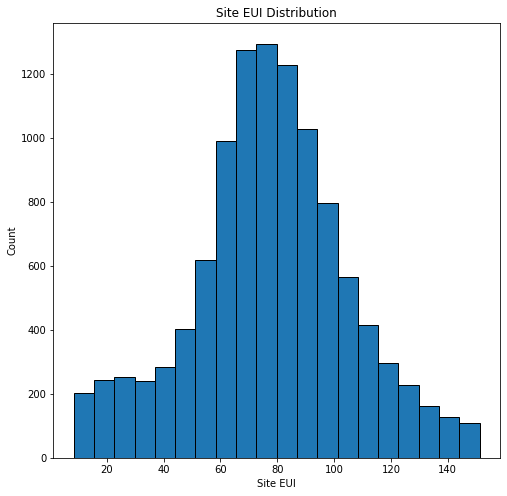

In [17]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

## Examing Building Usage 

In [18]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
building_types =data[data['Largest Property Use Type'].map(data['Largest Property Use Type'].value_counts()) >= 50]
types = list(types[types.values > 10].index)

print(building_types )

       Order  Property Id                                Property Name  \
6          7      4778352                      Annex Building & Garage   
9         12      3616379                     North Shore Towers Bld 1   
10        13      5870374                     North Shore Towers Bld 2   
11        14      5870375                     North Shore Towers Bld 3   
12        15      2637863                                Cadman Towers   
17        20      2777309                              Barnard College   
18        21      2780056          720-730 Ft. Washington Owners Corp.   
19        22      4988574               - 720 Ft. Washington Ave. bldg   
20        23      4988569                - 730 Ft. Washington Ave bldg   
21        24      2806486                        Park 76th Street Inc.   
22        25      4988686                       - 830 Park Avenue bldg   
23        26      4988688                       - 840 Park Avenue bldg   
24        27      2809896             

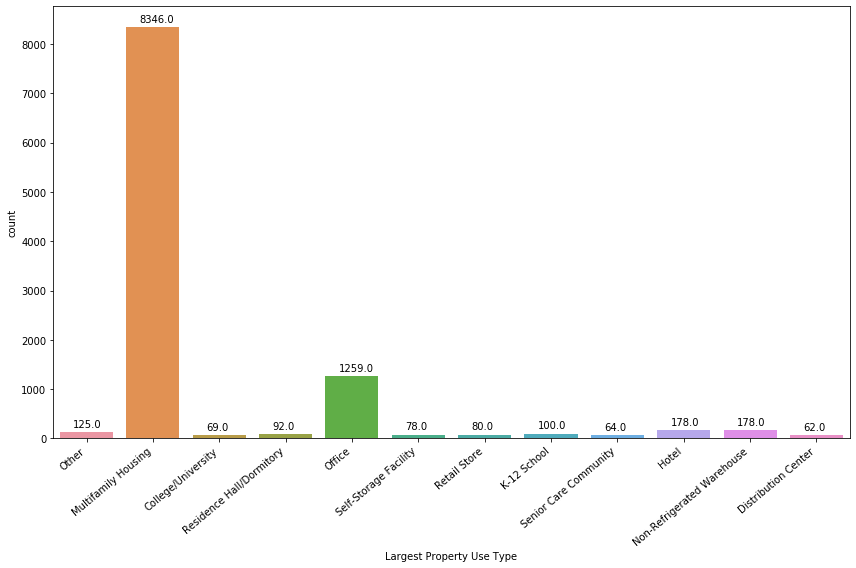

In [19]:
figsize(12, 8)
ax = sns.countplot(x ='Largest Property Use Type', data = building_types)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))

The vast majority of the buildings are family housing units, offices also has a considerable amount, it will be interesting to see if the type of use would influence the energy usage and rating, we would expect factories and similiar buildings to use more and perhaps have a lower rating as a result

In [20]:
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
print(types)

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']


Multifamily Housing
Office
Hotel
Non-Refrigerated Warehouse


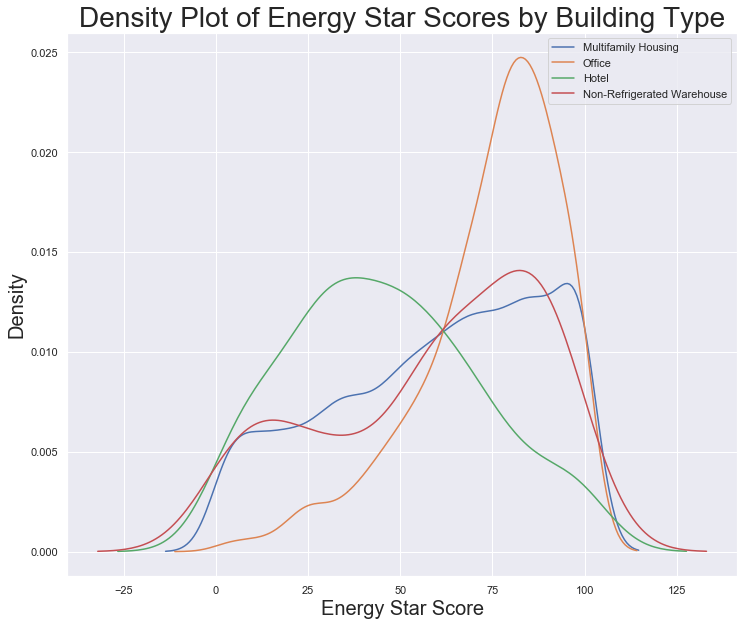

In [21]:
figsize(12, 10)
sns.set(style="darkgrid")

# Plot each building
for b_type in types:
    # Select the building type
    print(b_type)
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);
plt.legend()

As suspected the building use providues us important information about the score, for example if we look at the above graph, office buildings have a high density around a score of 75, implying they might be more energy efficent, perhaps because they are only consuming a large amount of energy during the workday ? If we compare this to hotels which have a below above score (going by the density plot) as they more than likely have high energy demands around the clock, this indicates that the building type can be a useful indicator of energy score. Sheerly based off the different distribution shapes we can tell this is a useful feature, if all categories mirrored the same distribution it might not be worth including

In [22]:

# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

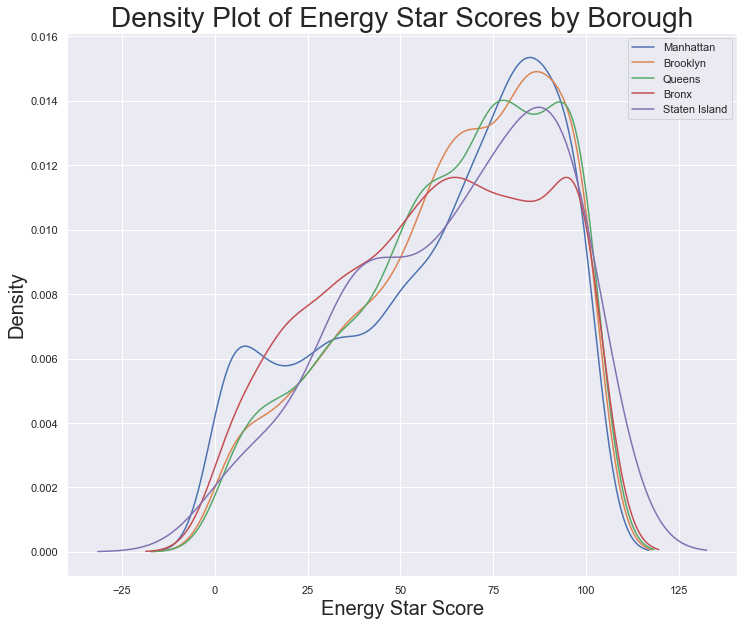

In [23]:


figsize(12, 10)
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);
plt.legend()

As mentioned earlier as all the boroughs tend to follow the same distribution meaning that the location of the building doesnt seem very uweful in predicting score and can more than likely be dropped from our analysis

In [24]:

# Create a list of boroughs with more than 100 observations
water_req= data.dropna(subset=['score'])
water_req = water_req['Water Required?'].value_counts()
water_req = list( water_req.index)


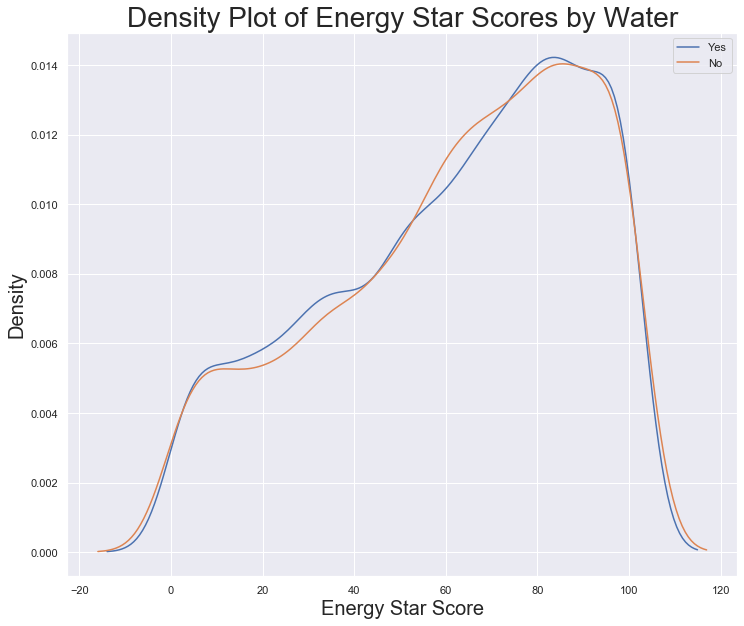

In [25]:


# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for water in water_req:
    # Select the building type
    subset = data[data['Water Required?'] == water]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = water);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Water', size = 28);
plt.legend()

Interesting water requirement seems to have no impact on the score

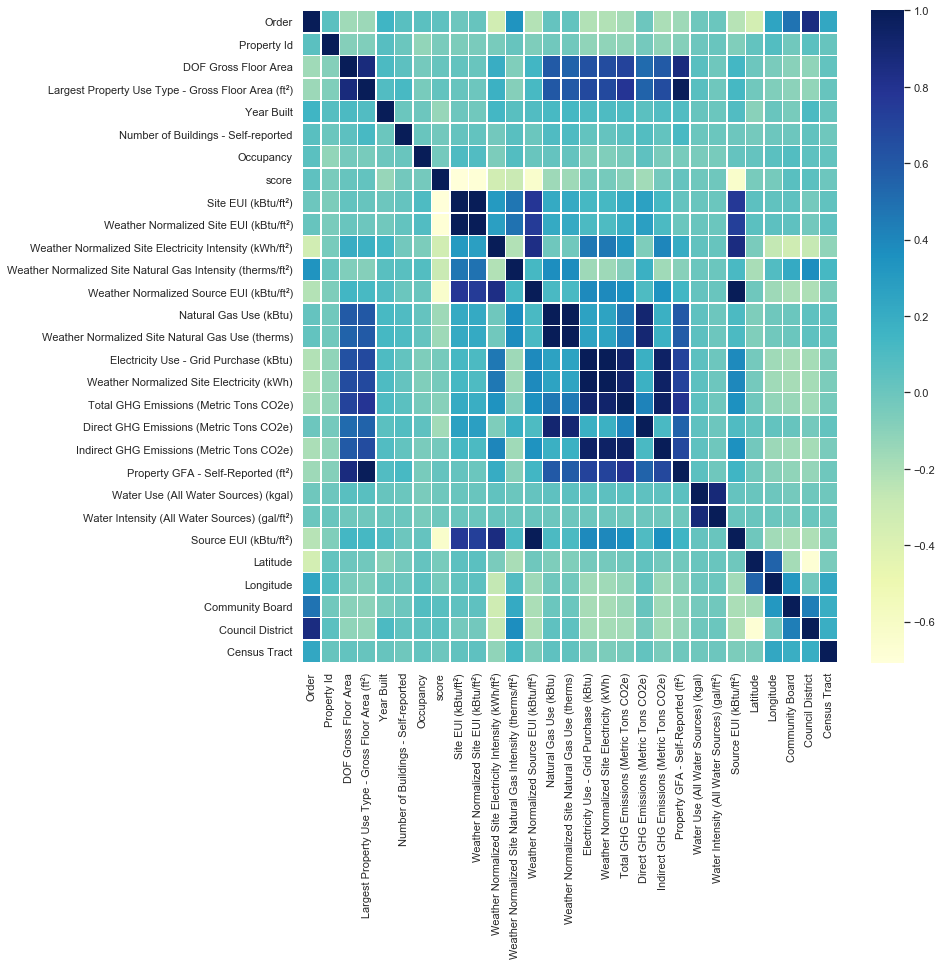

In [26]:
corrmat = data.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat,
                 annot=False,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()

We can see from the correlation matrix that several of the features have a high correlation with the score, most of these correlations seem to be negative correlations, We can also see areas of high  multicollinearity which need to be taken into consideration 

We have several features with strong negative correlations, there doesnt appear to be any positive relationships with our target

In [27]:
cat_features=[i for i in data.columns if data.dtypes[i]=='object']
features = pd.get_dummies(data)
features

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),...,NTA_Westchester-Unionport,NTA_Westerleigh,NTA_Williamsbridge-Olinville,NTA_Williamsburg,NTA_Windsor Terrace,NTA_Woodlawn-Wakefield,NTA_Yorkville,NTA_park-cemetery-etc-Bronx,NTA_park-cemetery-etc-Brooklyn,NTA_park-cemetery-etc-Manhattan
2,3,4778226,152765.0,231342.0,1924,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,4778267,891040.0,1305748.0,1971,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,4778288,211400.0,179694.0,1932,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,7,4778352,245000.0,245000.0,1932,1,60,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,12,3616379,3750565.0,2738875.0,1974,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
10,13,5870374,3750565.0,2738875.0,1974,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
11,14,5870375,3750565.0,2738875.0,1974,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,...,0,0,0,0,0,0,0,0,0,0
15,18,5245390,567517.0,567517.0,1950,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
16,19,4045810,53917.0,58893.0,1950,1,100,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

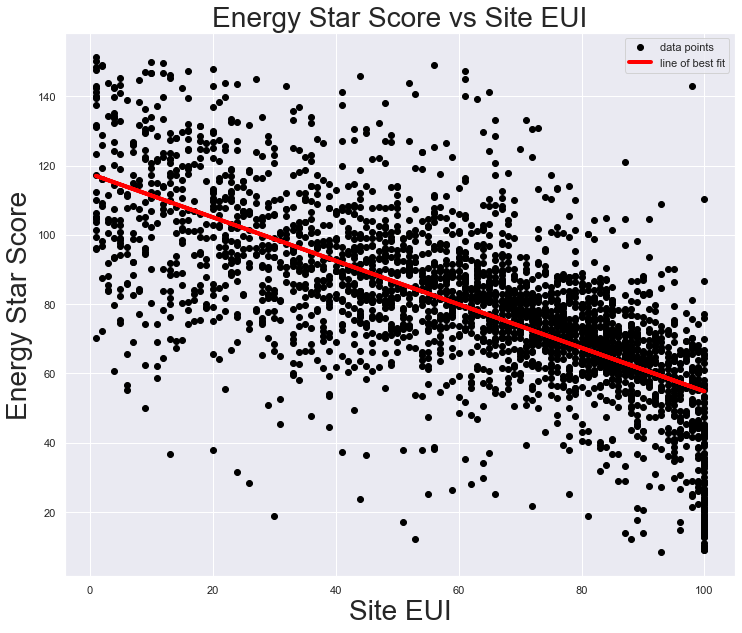

In [28]:
plot_site_score = data.copy()
plot_site_score.dropna(inplace=True)
x = plot_site_score ['score']
y =  plot_site_score ['Site EUI (kBtu/ft²)']
plt.plot(x, y,"o", color = "black")
#sns.regplot(data = data,x='GrLivArea', y='SalePrice')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, linewidth = 4, color = "red")

size = 28
plt.legend(["data points", "line of best fit"])
plt.xlabel("Site EUI", size = size)
plt.ylabel('Energy Star Score',size = size)
plt.title('Energy Star Score vs Site EUI', size = size)

We can see a clear negative relationship here, as the Site EUI increases there is a linear decrease in the score

C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


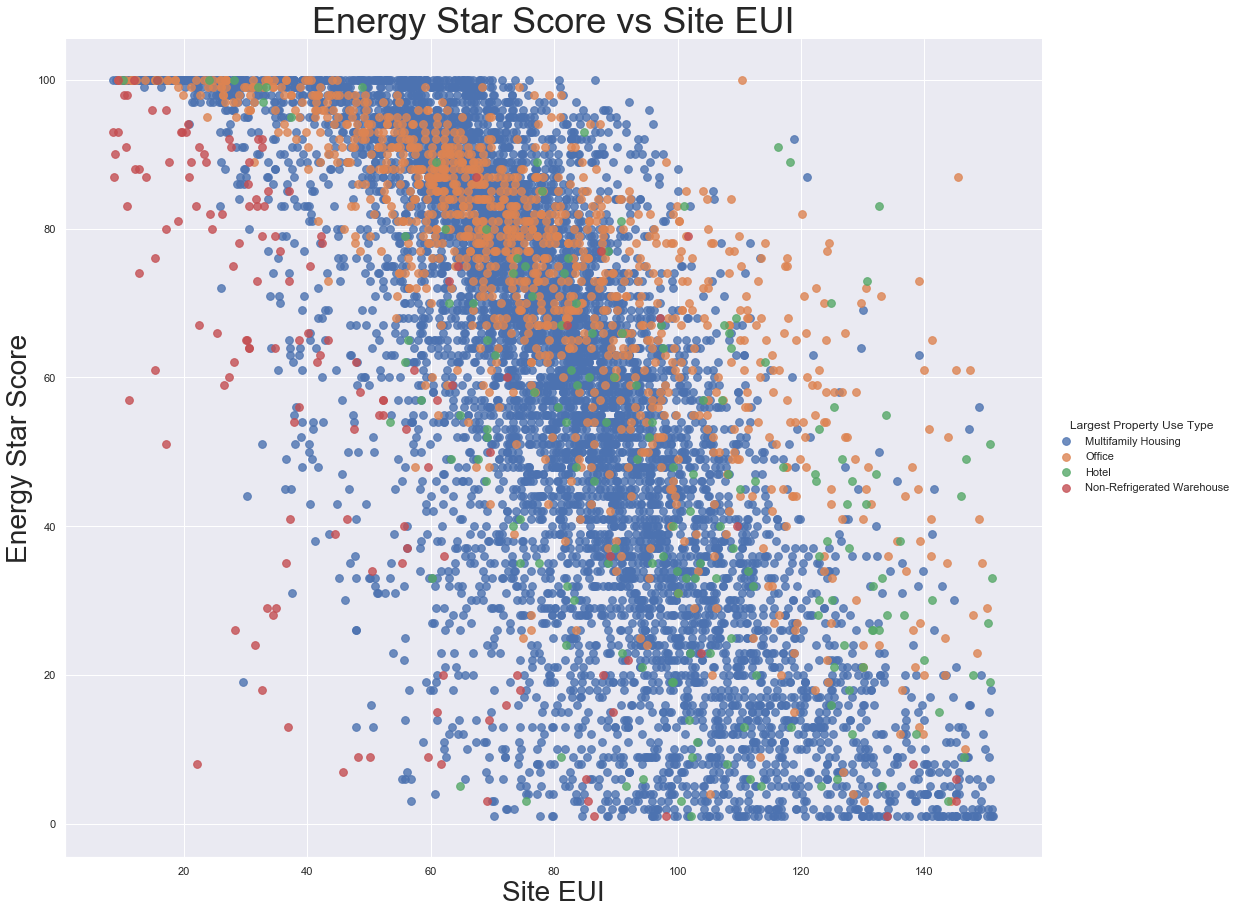

In [29]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


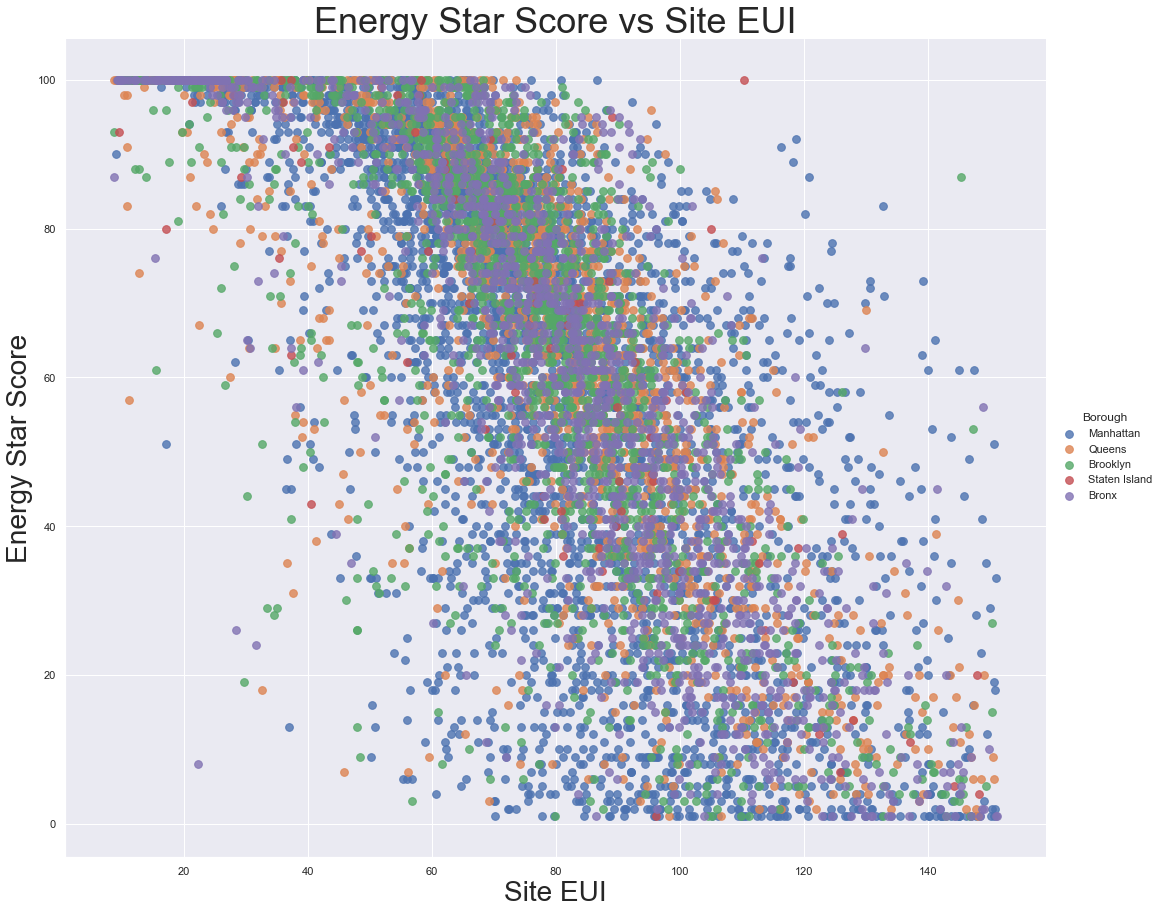

In [30]:
figsize(12, 10)

# Extract the building types
features['Borough'] = data.dropna(subset = ['score'])['Borough']


# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Borough', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\johnl\Anaconda\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


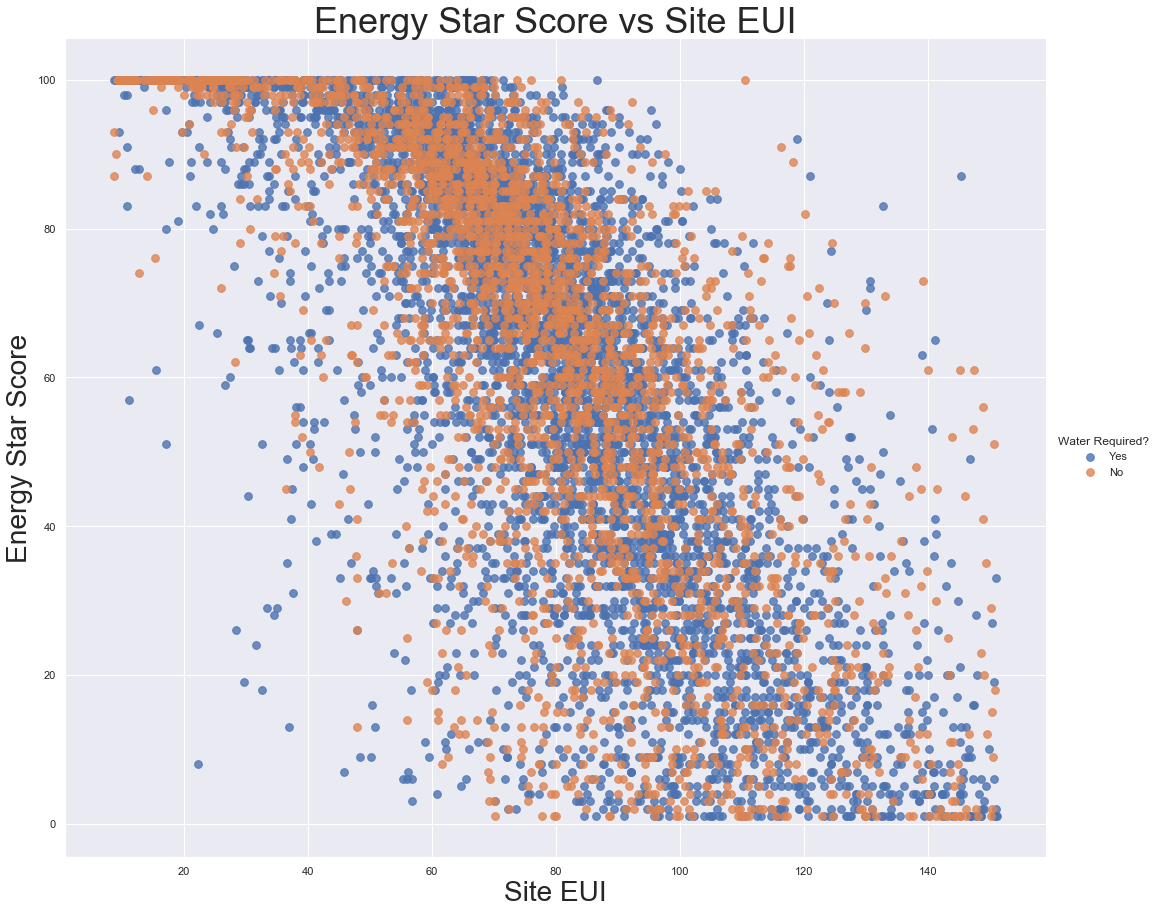

In [31]:
figsize(12, 10)

# Extract the building types
features['Water Required?'] = data.dropna(subset = ['score'])['Water Required?']


# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Water Required?', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

# Feature Engineering

In [32]:
cat_features=[i for i in data.columns if data.dtypes[i]=='object']
print(cat_features)

['Property Name', 'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported', 'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)', 'Postal Code', 'Street Number', 'Street Name', 'Borough', 'Primary Property Type - Self Selected', 'List of All Property Use Types at Property', 'Largest Property Use Type', 'Metered Areas (Energy)', 'Metered Areas  (Water)', 'Release Date', 'Water Required?', 'DOF Benchmarking Submission Status', 'NTA']


* Select only the numerical variables and useful categorical variables
* Add in the log transformation of the numerical variables to normalize 
* One-hot encode the categorical variables
* Remove collinear features

## Which categorical features to include
As shown above many of the categorical features arent helpful for our model, the majority of the features are descriptions like the ID or name of the building and their address <br> 
**Features we might include**
1. Largest Property Use Type
2. Primary Property Type - Self Selected
3. Water Required?
4. Borough


In [33]:
data[['Primary Property Type - Self Selected', 'Largest Property Use Type']]

,Primary Property Type - Self Selected,Largest Property Use Type
2,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical)
3,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical)
4,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical)
6,Mixed Use Property,Other
9,Multifamily Housing,Other
10,Multifamily Housing,Other
11,Multifamily Housing,Other
12,Multifamily Housing,Multifamily Housing
15,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical)
16,Medical Office,Medical Office


Largest Property Use Type and Primary Property Type - Self Selected have a large overlap so we will choose Largest Property Use Type over Primary Property Type as Largest Property Use Type is not self selected and thus should be more accurate/ objective

## One hot encoding

In [34]:
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type', 'Water Required?']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

## Log Transformation for Normalization 

In [35]:
numeric_subset = data.select_dtypes('number')

num_col = []
for i in numeric_subset.columns:
    if i != "score":
        num_col.append(i)
numeric_subset

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),...,Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
2,3,4778226,152765.0,231342.0,1924,1,100,NaN,NaN,NaN,...,0.0,231342.0,NaN,NaN,NaN,40.840427,-73.940249,12.0,10.0,251.0
3,4,4778267,891040.0,1305748.0,1971,1,100,NaN,NaN,NaN,...,0.0,1305748.0,NaN,NaN,NaN,40.840746,-73.942854,12.0,10.0,255.0
4,5,4778288,211400.0,179694.0,1932,1,100,NaN,NaN,NaN,...,0.0,179694.0,NaN,NaN,NaN,40.841559,-73.942528,12.0,10.0,255.0
6,7,4778352,245000.0,245000.0,1932,1,60,NaN,NaN,NaN,...,0.0,245000.0,NaN,NaN,NaN,40.765949,-73.953752,8.0,5.0,124.0
9,12,3616379,3750565.0,2738875.0,1974,1,100,NaN,NaN,NaN,...,0.0,912892.0,NaN,NaN,NaN,40.757859,-73.715543,13.0,23.0,155101.0
10,13,5870374,3750565.0,2738875.0,1974,1,100,NaN,NaN,NaN,...,0.0,912892.0,NaN,NaN,NaN,40.757859,-73.715543,13.0,23.0,155101.0
11,14,5870375,3750565.0,2738875.0,1974,1,100,NaN,NaN,NaN,...,0.0,912892.0,NaN,NaN,NaN,40.757859,-73.715543,13.0,23.0,155101.0
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,...,1043.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN
15,18,5245390,567517.0,567517.0,1950,1,100,NaN,NaN,NaN,...,0.0,567517.0,NaN,NaN,NaN,40.583953,-74.086930,2.0,50.0,70.0
16,19,4045810,53917.0,58893.0,1950,1,100,NaN,NaN,NaN,...,0.0,58893.0,NaN,NaN,NaN,40.586868,-74.086592,2.0,50.0,70.0


In [36]:
for col in num_col:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
numeric_subset.head()
combined = pd.concat([numeric_subset, categorical_subset], axis = 1)

combined.shape

C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(10929, 111)

## Collinear features
apply generic collinear removing function 

In [37]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [38]:
features = remove_collinear_features(combined, 0.6);

C:\Users\johnl\Anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [39]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(10929, 67)

# Training

In [40]:
# we have a large amount of NaN values so seperate
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)
train_features = X_train
train_labels = y_train
test_features = X_test
test_labels = y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6349, 66)
(2722, 66)
(6349, 1)
(2722, 1)


In [41]:
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6349, 66)
Testing Feature Size:   (2722, 66)
Training Labels Size:   (6349, 1)
Testing Labels Size:    (2722, 1)


# Baseline Model

In [42]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [43]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 78.10
Baseline Performance on the test set: MAE = 24.4416


The baseline guess is a score of 78.10 <br>
Baseline Performance on the test set: MAE = 24.4416<br> 
This shows our average estimate on the test set is off by about 25 points. <br>
The scores are between 1 and 100 so this means the average error from a naive method if about 25%. <br>


In [44]:
from sklearn.preprocessing import Imputer, MinMaxScaler
# Create an imputer object with a median filling strategy
imputer = Imputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X_train = imputer.transform(train_features)
X_test = imputer.transform(test_features)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


# Scaling

In [46]:

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:

# Convert y to one-dimensional array (vector)
y_train = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

# Evaluation Models

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [49]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

## 1. Linear Regression

In [50]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 12.7014


## 2. Random Forest Regression

In [51]:
random_forest = RandomForestRegressor()
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

C:\Users\johnl\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 9.8846


## 3. K-Nearest Neighbors Regression

In [52]:
knn = KNeighborsRegressor()
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 12.6513


## 4. Gradient Boosted Regression 

In [53]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 9.7705


## 5. Support Vector Machine Regression 

In [54]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.2619


## 6. XGB Regression


In [55]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_mae = fit_and_evaluate(xgb)

print('XGB Regression Performance on the test set: MAE = %0.4f' % xgb_mae)

XGB Regression Performance on the test set: MAE = 9.5372


C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


## 7. LGBM Regression


In [56]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm_mae = fit_and_evaluate(lgbm)

print('LGBM Regression Performance on the test set: MAE = %0.4f' % xgb_mae)

LGBM Regression Performance on the test set: MAE = 9.5372


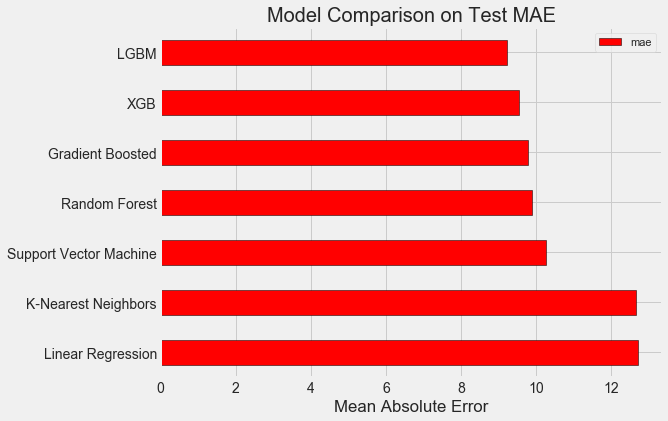

In [57]:

plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Random Forest','K-Nearest Neighbors',
                                            'Gradient Boosted', 'Support Vector Machine', 'XGB', 'LGBM'
                                            ],
                                 'mae': [lr_mae, random_forest_mae, knn_mae,
                                         gradient_boosted_mae, svm_mae, xgb_mae, lgbm_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Our top 3 models are LGBM, XGB, and Gradient Boosting so we will tune these models further 

## XGB Hypertuning

In [58]:

learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
max_depth=  [ 3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight = [ 1, 3, 5, 7 ]
gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
colsample_bytree= [ 0.3, 0.4, 0.5 , 0.7 ] 

hyperparameter_grid = {
                       "learning_rate" : learning_rate,
                       'max_depth': max_depth,
                       'min_child_weight': min_child_weight,
                       'gamma': gamma,
                       'colsample_bytree': colsample_bytree}

In [59]:

# Create the model to use for hyperparameter tuning
model = XGBRegressor()

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [60]:

# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                                          verbosity=None),
                   iid='warn', n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                             

In [61]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.224171,0.087494,0.012997,0.002106,5,4,0.2,0.1,0.7,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",...,-9.407846,0.077563,1,-7.533794,-7.372863,-7.536108,-7.513377,-7.381457,-7.467520,0.074251
1,4.531397,0.601611,0.010804,0.002980,7,8,0.1,0.3,0.7,"{'min_child_weight': 7, 'max_depth': 8, 'learn...",...,-9.461835,0.153380,2,-4.541918,-4.596554,-4.632350,-4.521444,-4.403198,-4.539093,0.078467
17,2.126114,0.122868,0.008179,0.001163,7,4,0.1,0,0.7,"{'min_child_weight': 7, 'max_depth': 4, 'learn...",...,-9.505413,0.102479,3,-8.255022,-8.301222,-8.362222,-8.298659,-8.245182,-8.292462,0.041518
16,1.763683,0.076758,0.008378,0.001353,7,3,0.2,0.1,0.7,"{'min_child_weight': 7, 'max_depth': 3, 'learn...",...,-9.569759,0.110694,4,-8.428596,-8.421948,-8.609039,-8.485211,-8.440672,-8.477093,0.069563
8,1.631836,0.123028,0.007781,0.001467,5,4,0.2,0.3,0.4,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",...,-9.635780,0.089955,5,-7.657766,-7.524266,-7.712915,-7.637970,-7.582206,-7.623025,0.064699
18,5.632139,0.642193,0.009774,0.001934,7,10,0.15,0.4,0.7,"{'min_child_weight': 7, 'max_depth': 10, 'lear...",...,-9.683136,0.194070,6,-2.256347,-2.402976,-2.387037,-2.308801,-2.342208,-2.339474,0.053204
13,2.032963,0.062129,0.008777,0.000399,5,5,0.25,0.2,0.4,"{'min_child_weight': 5, 'max_depth': 5, 'learn...",...,-9.695715,0.214377,7,-6.093470,-6.075376,-6.118409,-5.993611,-6.106875,-6.077549,0.044347
5,1.507558,0.046139,0.007495,0.001340,7,4,0.25,0,0.4,"{'min_child_weight': 7, 'max_depth': 4, 'learn...",...,-9.731030,0.101117,8,-7.450857,-7.307339,-7.466675,-7.348129,-7.296980,-7.373996,0.071471
4,2.259879,0.261826,0.008309,0.002436,5,5,0.3,0,0.4,"{'min_child_weight': 5, 'max_depth': 5, 'learn...",...,-9.756072,0.165342,9,-6.008933,-5.792873,-5.928117,-5.740340,-5.916524,-5.877358,0.097297
19,1.168874,0.065993,0.008977,0.003026,5,3,0.25,0,0.3,"{'min_child_weight': 5, 'max_depth': 3, 'learn...",...,-9.785820,0.116078,10,-8.567224,-8.472612,-8.525674,-8.532517,-8.498453,-8.519296,0.032020


In [62]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=4,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
# Default model
default_model = XGBRegressor()

# Select the best model
final_model =random_cv.best_estimator_



In [64]:
default_model_mae = fit_and_evaluate(default_model)

print('XGB Regression Performance on the test set: MAE = %0.4f' % default_model_mae)

XGB Regression Performance on the test set: MAE = 9.5372


C:\Users\johnl\Anaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [65]:
final_model_mae = fit_and_evaluate(final_model)

print('XGB Regression Performance on the test set: MAE = %0.4f' % final_model_mae)

XGB Regression Performance on the test set: MAE = 9.4585


## LGBM Hypertuning

In [66]:

        
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
boosting_type = ['gbdt', 'dart', 'goss']
sub_feature = [0.05,0.1,0.3, 0.5,0.7,0.8]
max_depth=  [ 3, 4, 5, 6, 8, 10, 12, 15]
num_leaves = [20,30,50,100,150,300,500]
colsample_bytree= [ 0.3, 0.4, 0.5 , 0.7 ]

In [67]:
model = LGBMRegressor()

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [68]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.2s finished


[LightGBM] [Warning] Unknown parameter: gamma


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_...
                                           subsample_freq=0),
                   iid='warn', n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3,

In [69]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.660680,0.036349,0.005687,0.000395,7,8,0.1,0.3,0.7,"{'min_child_weight': 7, 'max_depth': 8, 'learn...",...,-9.257911,0.110349,1,-6.821822,-6.805263,-6.862120,-6.830970,-6.844560,-6.832947,0.019391
18,0.830610,0.037234,0.009396,0.001755,7,10,0.15,0.4,0.7,"{'min_child_weight': 7, 'max_depth': 10, 'lear...",...,-9.309255,0.082177,2,-5.956558,-6.010279,-6.041690,-5.895092,-5.942429,-5.969209,0.051596
7,0.851507,0.031016,0.006996,0.001560,1,10,0.05,0.1,0.7,"{'min_child_weight': 1, 'max_depth': 10, 'lear...",...,-9.404682,0.124499,3,-7.797407,-7.761090,-7.801700,-7.750675,-7.744499,-7.771074,0.023889
6,0.745515,0.048710,0.006587,0.001461,1,15,0.2,0.4,0.7,"{'min_child_weight': 1, 'max_depth': 15, 'lear...",...,-9.431380,0.156044,4,-5.329338,-5.294635,-5.311802,-5.326228,-5.203460,-5.293093,0.046472
0,0.324378,0.048165,0.006397,0.001724,5,4,0.2,0.1,0.7,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",...,-9.448090,0.147203,5,-7.751637,-7.664575,-7.797779,-7.813350,-7.767686,-7.759005,0.051968
17,0.431594,0.038830,0.006793,0.001597,7,4,0.1,0,0.7,"{'min_child_weight': 7, 'max_depth': 4, 'learn...",...,-9.531118,0.083779,6,-8.462092,-8.470817,-8.536668,-8.426077,-8.445649,-8.468261,0.037456
9,0.752751,0.009792,0.006819,0.001163,3,12,0.1,0.1,0.5,"{'min_child_weight': 3, 'max_depth': 12, 'lear...",...,-9.555384,0.056080,7,-6.877682,-6.818049,-6.904484,-6.869593,-6.796324,-6.853226,0.039922
16,0.262883,0.060220,0.005191,0.001609,7,3,0.2,0.1,0.7,"{'min_child_weight': 7, 'max_depth': 3, 'learn...",...,-9.680012,0.107114,8,-8.559799,-8.589979,-8.798206,-8.618558,-8.733759,-8.660060,0.090777
8,0.356126,0.034983,0.004284,0.000396,5,4,0.2,0.3,0.4,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",...,-9.701221,0.092778,9,-8.093116,-7.930782,-8.051809,-7.973440,-7.887122,-7.987254,0.075869
11,1.006820,0.054299,0.007387,0.001366,5,10,0.15,0.1,0.4,"{'min_child_weight': 5, 'max_depth': 10, 'lear...",...,-9.738266,0.095406,10,-6.400698,-6.347407,-6.375575,-6.347274,-6.336431,-6.361477,0.023512


In [70]:
random_cv.best_estimator_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
              gamma=0.3, importance_type='split', learning_rate=0.1,
              max_depth=8, min_child_samples=20, min_child_weight=7,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [71]:
# Default model
default_model = LGBMRegressor()


# Select the best model
final_model =random_cv.best_estimator_


In [72]:
default_model_mae = fit_and_evaluate(default_model)

print('LGBM Regression Performance on the test set: MAE = %0.4f' % default_model_mae)

LGBM Regression Performance on the test set: MAE = 9.2225


In [73]:
final_model_mae = fit_and_evaluate(final_model)

print('LGBM Regression Performance on the test set: MAE = %0.4f' % final_model_mae)

[LightGBM] [Warning] Unknown parameter: gamma
LGBM Regression Performance on the test set: MAE = 9.2223


# Conclusion 

Our model was off by an average of 9.22 points using either our LGBM or XGB model, while this defintely needs to be improved it still vastly outperforms our baseline model which was on average 25 points off.  <br>
With the the data we have we can predict the Energy Star Score of a building to within 10 points. <br>
The key variables for predicting  Energy Star Score are the Energy Use Intensity, Electricity Use Intensity, and the Water Use Intensity <br>

### Still To-do  <br>
* Improve formatting
* Improve model accuracy ( more than likely through feature engineering)
* Add more comments (makes easier to look over topics)